In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import CSV files and concatenate into one DataFrame

df = pd.read_csv("titanic.csv")
df2 = pd.read_csv("titanic2.csv")
frames = [df, df2]
full_df = pd.concat(frames)

# remove null values from the features being used for the models

df = full_df[(full_df.sex.isnull() == False) & (full_df.survived.isnull() == False) & (full_df.pclass.isnull() == False)]

# Encode 'sex' column as 1 (male) or 0 (female)

df['sex_int']=df['sex'].map(lambda x: 1 if x=="male" else 0)

Xtrain = df[['sex_int', 'pclass']]
ytrain = df[['survived']]

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.3, random_state=42)

<ipython-input-1-ecc9fa58a726>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_int']=df['sex'].map(lambda x: 1 if x=="male" else 0)


In [2]:
# Sigmoid function

def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    

    # calculate the sigmoid of z
    h = 1 / (1+np.exp(-z))

    
    return h

# Gradient descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1./m)*(np.dot(np.transpose(y),np.log(h))+np.dot(np.transpose(1-y),np.log(1-h)))
        if i%100==0:
            print("cost is: ",J)

        # update the weights theta
        theta = theta - (alpha / m)*np.dot((np.transpose(x)),(h-y))
        
    J = float(J)
    return J, theta

# Testing logistic regression function

def test_logistic_regression(test_x, test_y,theta):
    """
    Input: 
        test_x: a list of individuals
        test_y: (m, 1) vector with the corresponding labels for the list of individuals
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of individuals classified correctly) / (total # of individuals)
    """
    # the list for storing predictions
    y_hat = []
    
    # get the label prediction for the individual
    y_pred = sigmoid(np.dot(test_x, theta))
    
    print(y_pred.shape)
    
    m = test_y.shape[0]
    y_hat = 1.0*(y_pred.reshape(m,) > 0.5)

    accuracy = (np.sum(y_hat==test_y.reshape(m,))) / (m)

    ### END CODE HERE ###
    
    return accuracy, y_hat

# Design matrices

X = np.hstack([np.ones((len(X_train),1)), X_train])
y = y_train.values
print("the shape of X is: ", X.shape)
print("the shape of y is: ", y.shape)
X2 = np.hstack([np.ones((len(X_test),1)), X_test])
y2 = y_test.values
print("the shape of X2 is: ", X2.shape)
print("the shape of y2 is: ", y2.shape)

the shape of X is:  (922, 3)
the shape of y is:  (922, 1)
the shape of X2 is:  (396, 3)
the shape of y2 is:  (396, 1)


In [3]:
# training labels corresponding to X

X = X
Y = y

# Apply gradient descent

alpha= 0.01
iters= 1500

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), alpha, iters)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

cost is:  [[0.69314718]]
cost is:  [[0.62906472]]
cost is:  [[0.61819191]]
cost is:  [[0.60970555]]
cost is:  [[0.60194932]]
cost is:  [[0.59480409]]
cost is:  [[0.58821396]]
cost is:  [[0.58212978]]
cost is:  [[0.5765067]]
cost is:  [[0.57130385]]
cost is:  [[0.56648406]]
cost is:  [[0.56201356]]
cost is:  [[0.55786174]]
cost is:  [[0.55400083]]
cost is:  [[0.55040569]]
The cost after training is 0.54708595.
The resulting vector of weights is [0.46625384, -1.06035342, -0.19290598]


In [4]:
tmp_accuracy, y_hat = test_logistic_regression(X2, y2, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.8f}")

(396, 1)
Logistic regression model's accuracy = 0.78282828


## Decision Tree

In [5]:
subprocess_dir = r'C:\Users\Josh\OneDrive - smumn.edu\School\BIA 680 Python for Artificial Intelligence\Week 5'
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import subprocess
import os

os.environ["PATH"] += os.pathsep + r'C:\Users\Josh\Anaconda3\Library\bin\graphviz'

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sex_int &le; 0.5<br/>gini = 0.472<br/>samples = 922<br/>value = [570, 352]>, fillcolor="#f5cfb3"] ;
1 [label=<pclass &le; 2.5<br/>gini = 0.385<br/>samples = 323<br/>value = [84, 239]>, fillcolor="#7fbfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.118<br/>samples = 175<br/>value = [11, 164]>, fillcolor="#46a4e7"] ;
1 -> 2 ;
3 [label=<gini = 0.5<br/>samples = 148<br/>value = [73, 75]>, fillcolor="#fafcfe"] ;
1 -> 3 ;
4 [label=<pclass &le; 1.5<br/>gini = 0.306<br/>samples = 599<br/>value = [486, 113]>, fillcolor="#eb9e67"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label=<gini = 0.439<br/>samples = 126<br/>value = [85, 41]>, fillcolor="#f2be99"] ;
4 -> 5 ;
6 [label=<gini = 0.258<br/>samples = 473<br/>value = [401, 72]>, fillcolor="#ea985d"] ;
4 -> 6 ;
}
<class 'pydotplus.graphviz.Dot'>


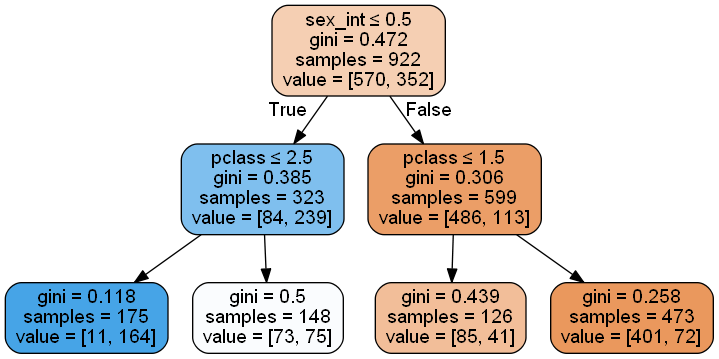

<class 'str'>


In [6]:
def build_decision_tree(maxdepth,minsamplesleaf,train_X,train_y,subprocess_dir):
    dt = tree.DecisionTreeClassifier(max_depth=maxdepth, min_samples_leaf=minsamplesleaf) 
                                     #presort=True
                                     #max_leaf_nodes=5, 
                                     #class_weight=None )
    X_train_dt = train_X
    y_train_dt = train_y
    var = X_train_dt.columns.values
    dt.fit(X_train_dt, y_train_dt)
    dot_data = StringIO()
    dotfile='tree.dot'
    export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=var)
    print(dot_data.getvalue())
    #above creates an xml / dot file of the fitted tree
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    print(type(graph))
    display(Image(graph.create_png()))
    graph.write_png('tree.png')
    print(type(dot_data.getvalue()))
    fh = open(dotfile, 'w')  
    fh.write(dot_data.getvalue())  
    fh.close()  
    graph2 = pydotplus.graph_from_dot_file('tree.dot')
    return graph2, dt
    #the above subprocess runs the dot.exe executable file, which 
    #takes as input the tree.dot word file and outputs a tree diagram into 
    #the pngfile - tree.png file in our current directory
graph, dt=build_decision_tree(2,100,X_train,y_train,subprocess_dir)

In [7]:
predictions=dt.predict(X2[:,1:]) 

In [8]:
predictions.shape

(396,)

In [9]:
y2.shape

(396, 1)

In [11]:
#obtain the accuracy of the tree model on training data and compare against Logistic Regression:
tree_accuracy=np.sum(predictions==y2.reshape(396,)) / len(predictions)
print(f"Decision tree model's accuracy = {tree_accuracy:.8f}")

Decision tree model's accuracy = 0.76515152


### 3. Compare performance of the two models: which one has higher accuracy on the training and test sets? Which one has higher bias and which one has higher variance / over fitting?

The models from the lecture notes that were trained on the entire dataset had a slightly higher accuracy (0.78376328) than the logistic regression and decision tree models using the split dataset (0.78282828 for LR, 0.76515152 for DT). The models trained on the entire dataset are likely over fitted. This is expected because of using the entire dataset, so when the data is split into training and test sets, we should usually expect the accuracy to be lower when testing on test data. This also means the variance is higher when testing on the test data.